# Частина 1

*В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.*


*На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.*



In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras import losses
from keras import metrics


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6955 - loss: 0.8293 - val_accuracy: 0.8398 - val_loss: 0.4364
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8593 - loss: 0.3822 - val_accuracy: 0.8588 - val_loss: 0.3761
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8844 - loss: 0.3203 - val_accuracy: 0.8782 - val_loss: 0.3425
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8952 - loss: 0.2781 - val_accuracy: 0.8905 - val_loss: 0.2949
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9064 - loss: 0.2577 - val_accuracy: 0.8905 - val_loss: 0.3001
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9107 - loss: 0.2410 - val_accuracy: 0.8977 - val_loss: 0.2784
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9219 - loss: 0.2145 - val_accuracy: 0.9082 - val_loss: 0.2557
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9274 - loss: 0.1943 - val_accuracy: 0.9066 - val_

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\ntest accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8995 - loss: 0.4188

test accuracy: 0.9025999903678894


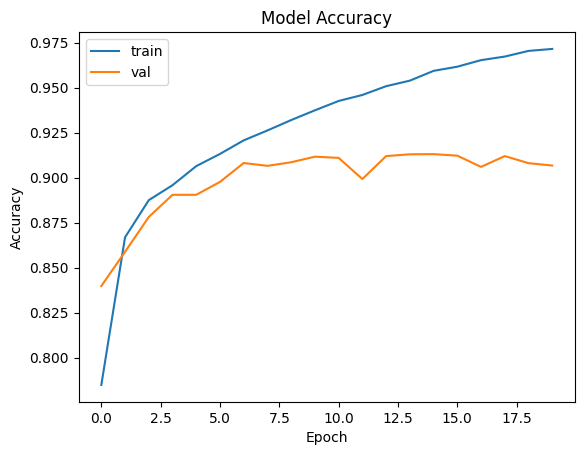

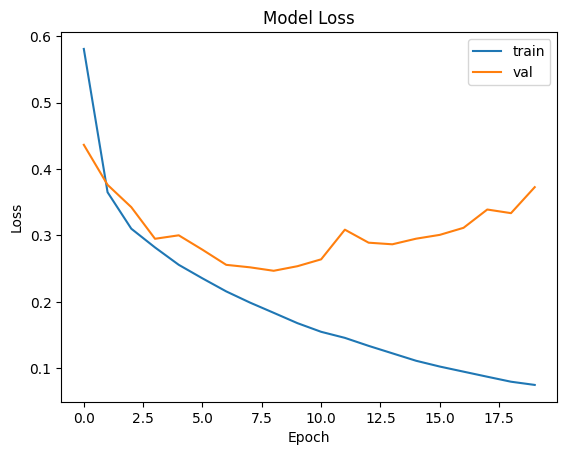

In [8]:
plt.plot(history.history['accuracy'], label='Accurancy on train data')
plt.plot(history.history['val_accuracy'], label='Accurancy on test data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'], label='Loss on train data')
plt.plot(history.history['val_loss'], label='Loss on test data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7381 - loss: 0.7274 - val_accuracy: 0.8628 - val_loss: 0.3723
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8683 - loss: 0.3591 - val_accuracy: 0.8744 - val_loss: 0.3477
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8934 - loss: 0.2921 - val_accuracy: 0.8890 - val_loss: 0.3031
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9047 - loss: 0.2585 - val_accuracy: 0.8916 - val_loss: 0.3050
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.2293 - val_accuracy: 0.8986 - val_loss: 0.2781
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9209 - loss: 0.2103 - val_accuracy: 0.8874 - val_loss: 0.3027
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9295 - loss: 0.1955 - val_accuracy: 0.9075 - val_loss: 0.2581
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9353 - loss: 0.1735 - 

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\ntest accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.4400

test accuracy: 0.900600016117096


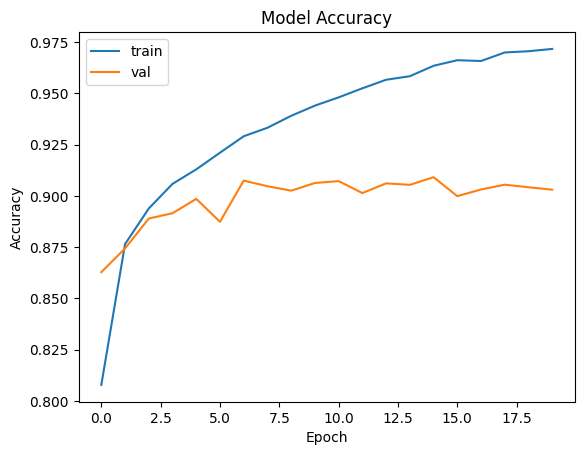

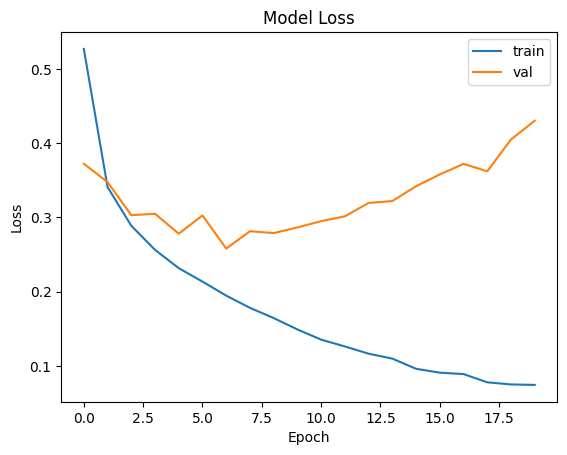

In [12]:
plt.plot(history.history['accuracy'], label='Accurancy on train data')
plt.plot(history.history['val_accuracy'], label='Accurancy on test data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'], label='Loss on train data')
plt.plot(history.history['val_loss'], label='Loss on test data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

Точність на навчальних даних зростає набагато швидше, ніж на тестових.
На тестових даних результати гірші, ніж на тренувальних. Та зростає помилка починаючи з дечятої епохи. Враховуючи це, можна зробити висновок, що спостерігається перенавчання.
Крім того, порівнюючи попередню домашню роботу, то точніть CNN краще на декілька відотків, а саме, 90% проти 88%.

In [13]:
from tensorflow.keras.models import save_model

In [14]:
model.save('model_name.h5')  # Збереження в HDF5 форматі

In [15]:
from google.colab import files

files.download('model_name.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>